In [ ]:
# Import libraries
import numpy as np
import pandas as pd

# Import the StandardScaler class
from sklearn.preprocessing import StandardScaler

# To generate and print the dendrograms for single and complete linkage, using both Euclidean and Cityblock distance metrics.
from scipy.cluster.hierarchy import dendrogram, linkage # hierarchical clustering
from scipy.spatial.distance import pdist # for computing distance metrics.

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
# Load data
df = pd.read_csv('Iris.csv')

# Select useful features (assuming 'sepal length (cm)' and 'sepal width (cm)' are columns)
X = df[['SepalLengthCm', 'SepalWidthCm']].values.reshape(-1, 2)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Data size:', X_scaled.shape)

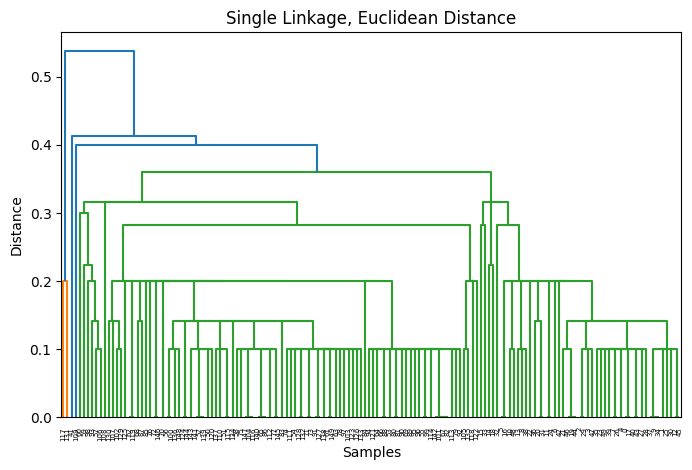

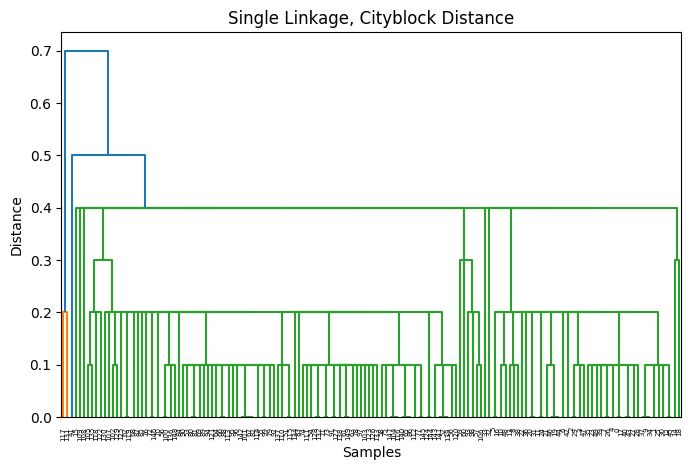

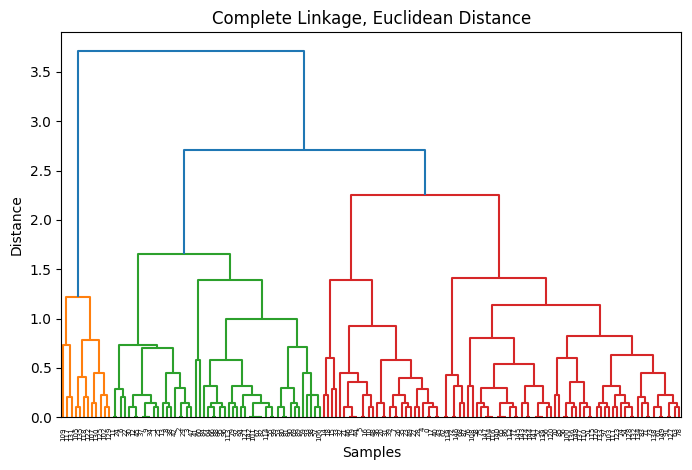

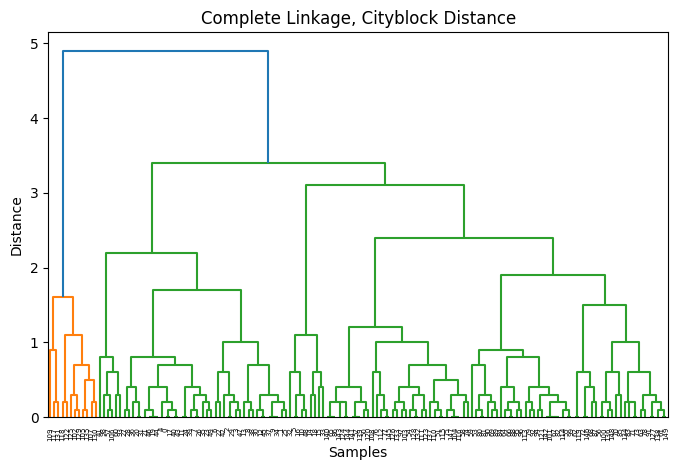

In [ ]:
# Define a function to plot a dendrogram for a given linkage method and distance metric
def plot_dendrogram(X, method, metric, title):
    plt.figure(figsize = (8, 5))
    Z = linkage(X, method=method, metric=metric)
    dendrogram(Z)
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

# Plot the four dendrograms:
# Single linkage with Euclidean distance
plot_dendrogram(X, method = 'single', metric = 'euclidean', title = 'Single Linkage, Euclidean Distance')

# Single linkage with Cityblock (Manhattan) distance
plot_dendrogram(X, method = 'single', metric = 'cityblock', title = 'Single Linkage, Cityblock Distance')

# Complete linkage with Euclidean distance
plot_dendrogram(X, method = 'complete', metric = 'euclidean', title = 'Complete Linkage, Euclidean Distance')

# Complete linkage with Cityblock (Manhattan) distance
plot_dendrogram(X, method = 'complete', metric = 'cityblock', title = 'Complete Linkage, Cityblock Distance')

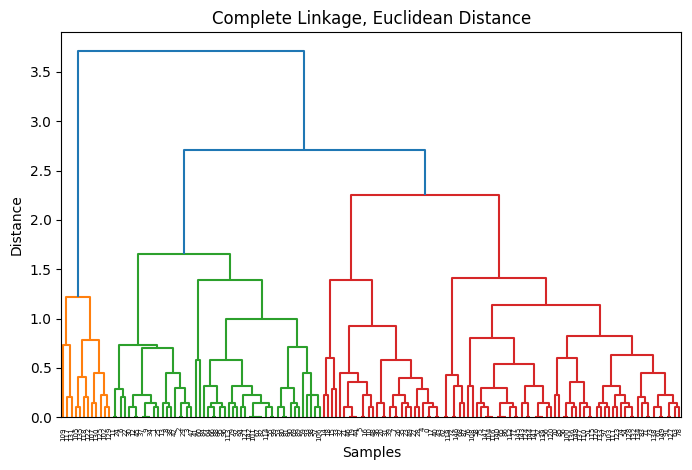

Silhouette Score: 0.209
The clustering solution is acceptable but shows some overlap between clusters.


In [ ]:
# Plot the chosen dendrogram (Complete Linkage with Euclidean Distance)
plt.figure(figsize = (8, 5))
Z = linkage(X, method ='complete', metric = 'euclidean')
dendrogram(Z)
plt.title('Complete Linkage, Euclidean Distance')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Perform Agglomerative Hierarchical Clustering
# Assuming we select 3 clusters based on the dendrogram
agg_cluster = AgglomerativeClustering(n_clusters = 3, linkage ='complete', metric ='euclidean')
labels = agg_cluster.fit_predict(X)

# Calculate Silhouette Score to evaluate clustering
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Comment on clustering confidence based on Silhouette Score
if silhouette_avg > 0.5:
    print("The clusters are well-defined, showing a high degree of separation.")
elif 0.2 < silhouette_avg <= 0.5:
    print("The clustering solution is acceptable but shows some overlap between clusters.")
else:
    print("The clusters are poorly defined, and the clustering solution might need improvement.")
